# Optimizing conversion rate

The data conatins the information of whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
Two questions to answewr in this project:
1. Predict conversion rate
2. Come up with recommendations for the product team and the marketing team to improve conversion rate

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("../Conversion_Rate/conversion_data.csv")
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
# data types of the dataframe
print df.dtypes, len(df)

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object 316200


In [4]:
# check if there is any null value or empty cells
print pd.isnull(df['country']).sum(),pd.isnull(df['age']).sum(),pd.isnull(df['new_user']).sum(), pd.isnull(df['source']).sum(), pd.isnull(df['total_pages_visited']).sum(),pd.isnull(df['converted']).sum()

0 0 0 0 0 0


In [5]:
# look at the data in each column and find the outlier, such as age 123 and 111
print pd.unique(df['country']), sorted(pd.unique(df['age'])),pd.unique(df['new_user']),pd.unique(df['source']),sorted(pd.unique(df['total_pages_visited'])),pd.unique(df['converted'])

['UK' 'US' 'China' 'Germany'] [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123] [1 0] ['Ads' 'Seo' 'Direct'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [0 1]


In [6]:
# drop the outliers of age 123 and 111
df = df[(df['age'] != 111) & (df['age'] != 123)]

In [7]:
len(df) # 316200 minus 2 outliers

316198

In [8]:
df_country = df.groupby(['country']).agg({'converted':lambda x: x.sum()/float(len(x))})
df_country = pd.DataFrame(df_country.to_records())
df_country.head()

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


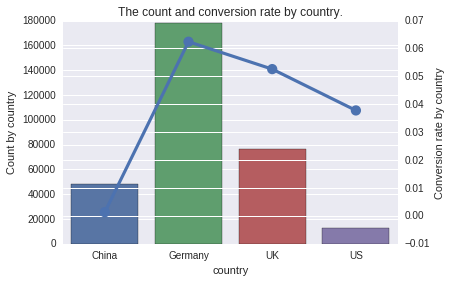

In [9]:
# visualize the data distribution by country, age, new_user,source,total_page_visted, and converted
ax1 = sns.countplot(df['country'])
ax1.set_ylabel('Count by country')
ax2 = plt.twinx(ax1)
sns.pointplot(x = df_country['country'], y = df_country['converted'], ax = ax2)
ax2.set_ylabel('Conversion rate by country')
plt.title('The count and conversion rate by country.')

China has the lowest conversion rate, Germany has the highest followed by UK and US. Germany also has the highest counts followed by UK, China, US. Effort should be put into find the difference in marketing between Germany, UK, US and China and try to improve the conversion rate. Maybe a lower price to pump up the demand and over profit depending on the price elasticity. 

China is very different from the other 3 developed countries. But surprisingly the company has very low presence in US while the conversion rate is comparable. Efforts can be put in market penetration in US and UK.

  age_bins  converted
0   15to20   0.062725
1   20to40   0.031399
2   40to60   0.010366
3   60to80   0.004255


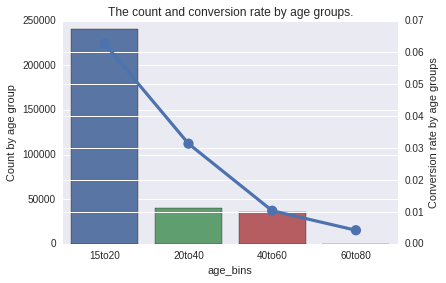

In [10]:
bins = [0,20,40,60,80]
labels = ['15to20','20to40','40to60','60to80']
df['age_bins'] = pd.cut(df['age'], bins, labels = labels)
df['age_bins'] = df['age_bins'].astype('str') # the data type category cannot apply to pd dataframe to records, so convert to str
df_age = df.groupby(['age_bins']).agg({'converted':lambda x: x.sum()/float(len(x))})
df_age = pd.DataFrame(df_age.to_records())
print df_age.head()
ax1 = sns.countplot(df['age_bins'])
ax1.set_ylabel('Count by age group')
ax2 = plt.twinx(ax1)
sns.pointplot(x = df_age['age_bins'], y = df_age['converted'], ax = ax2)
ax2.set_ylabel('Conversion rate by age groups')
plt.title('The count and conversion rate by age groups.')

The product is very popular in young people from age 17 to 20 which takes more than 80% of the total consumption and the conversion rate among this group is also the highest. While the amount of 20 to 40 age group and 40 to 60 is similar the conversion rate vary a lot. Is the product designed for young people only? Is it possible to design a pivoted version for the elder group of people to improve the conversion rate in 40 to 60 age group as well?

   new_user  converted
0         0   0.071983
1         1   0.014021


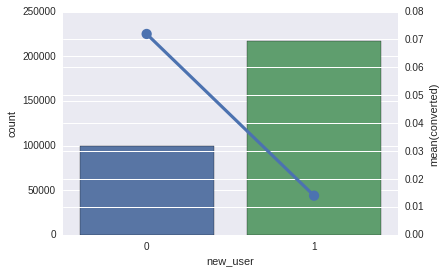

In [11]:
df_new_user = df.groupby(['new_user']).agg({'converted': lambda x: float(x.sum())/len(x)})
df_new_user = pd.DataFrame(df_new_user.to_records())
print df_new_user.head()
ax1 = sns.countplot(df['new_user'])
ax2 = plt.twinx(ax1)
sns.pointplot(x = df_new_user['new_user'], y = df_new_user['converted'], ax = ax2)

While the returning user is roungly 30% of the total clicks history, the conversion rate of returning customers are much higher. We need to comapre the conversion rate of the new user to industry average or best practice to see if this is in par. It seems that the ads, seo or direct visiting the websites new user are a lot, but conversion rate is low. Is there any other marketing that can be done to increase their willingness to try the product out, such as a free tiral for 7 days?

   source  converted
0     Ads   0.034472
1  Direct   0.028169
2     Seo   0.032888


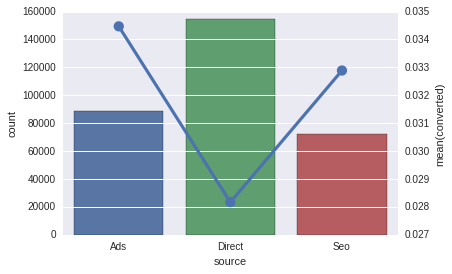

In [12]:
df_source = df.groupby(['source']).agg({'converted': lambda x: float(x.sum())/len(x)})
df_source = pd.DataFrame(df_source.to_records())
print df_source.head()
ax1 = sns.countplot(df['source'])
ax2 = plt.twinx(ax1)
sns.pointplot(x = df_source['source'], y = df_source['converted'], ax = ax2)

It is shown that customers who come from Ads or search engine have higher conversion rate, probably because they already know our product and have better intention to purchase the product. Efforts need to be made in our website design and change various design to test the attractiveness to users to improve the conversion rate of the direct visit to our website.

  page_bins  converted
0     00to5   0.000535
1    05to10   0.015574
2    10to15   0.313405
3    15to20   0.933737
4    20to25   1.000000


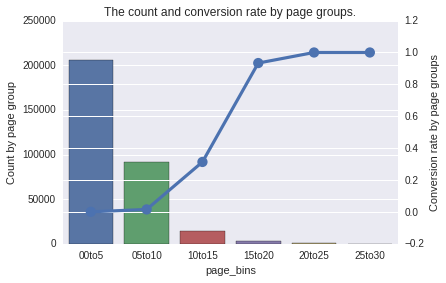

In [13]:
bins = [0,5,10,15,20,25,30]
labels = ['00to5','05to10','10to15','15to20','20to25','25to30']
df['page_bins'] = pd.cut(df['total_pages_visited'], bins, labels = labels)
df['page_bins'] = df['page_bins'].astype('str') # the data type category cannot apply to pd dataframe to records, so convert to str
df_page = df.groupby(['page_bins']).agg({'converted':lambda x: x.sum()/float(len(x))})
df_page = pd.DataFrame(df_page.to_records())
print df_page.head()
ax1 = sns.countplot(df['page_bins'])
ax1.set_ylabel('Count by page group')
ax2 = plt.twinx(ax1)
sns.pointplot(x = df_page['page_bins'], y = df_page['converted'], ax = ax2)
ax2.set_ylabel('Conversion rate by page groups')
plt.title('The count and conversion rate by page groups.')

The result is very ineteresting and showed that the more pages the user vists, the more interested they are and they more likely they will be converted. At least 10 pages have to be visited till the conversion rate is significantly greater than 0. Users who visited more than 15 pages conversion rate is more than 90%. It seems that they more they play around with the website and dig around, they more they like our product. Therefore, effrots should be made into how to attract users to stay on the webpage and click around.

In [14]:
print 'The conversion rate is %f' % (float(np.count_nonzero(df['converted']))/len(df['converted']))

The conversion rate is 0.032252


In [15]:
# could not convert string to float: Ads so assign numeric valule to the string category
#df['country'] = df['country'].astype('category')
#df['source'] = df['source'].astype('category')
def map_values(row, values_dict):
    return values_dict[row]
values_dict = {'China':1, 'US': 2, 'UK': 3, 'Germany': 4}
df['country_code'] = df['country'].apply(map_values, args = (values_dict,))

In [16]:
values_dict = {'Ads': 3, 'Seo': 2, 'Direct': 1}
df['source_code'] = df['source'].apply(map_values, args = (values_dict,))
df.head()

,country,age,new_user,source,total_pages_visited,converted,age_bins,page_bins,country_code,source_code
0,UK,25,1,Ads,1,0,20to40,00to5,3,3
1,US,23,1,Seo,5,0,20to40,00to5,2,2
2,US,28,1,Seo,4,0,20to40,00to5,2,2
3,China,39,1,Seo,5,0,20to40,00to5,1,2
4,US,30,1,Seo,6,0,20to40,05to10,2,2


In [17]:
# split the data to train and test
feats = ['country_code','new_user','age','source_code','total_pages_visited']
X = df[feats]
y = df['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

,country_code,new_user,age,source_code,total_pages_visited
0,3,1,25,3,1
1,2,1,23,2,5
2,2,1,28,2,4
3,1,1,39,2,5
4,2,1,30,2,6


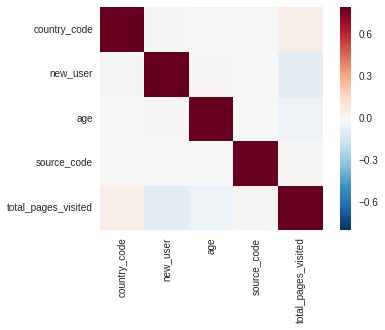

In [18]:
# look at the correlation among the features
corrmat = X.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
X.head()

In [19]:
# use logistic regression to fit the data with high prediction accuracy
log_reg = LogisticRegression()
Log_score = log_reg.fit(X_train, y_train).score(X_test,y_test)
print Log_score, log_reg.coef_

0.98569183294 [[ 0.73417032 -1.72030441 -0.07408792  0.07142362  0.75063   ]]


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

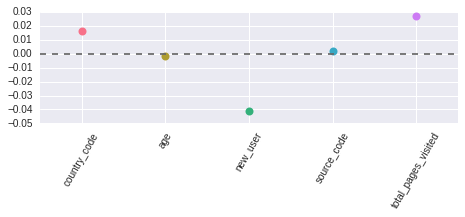

In [20]:
# visualize the coefficient of the features which showed country, new_user and total_pages_visted are the most important features.
f = 'converted ~ country_code + age + new_user + source_code + total_pages_visited'
sns.coefplot(f, df,intercept=False)
plt.xticks(rotation = 60)

In [21]:
# use random forest to train the data and compare with logistic regression, not better than logistic regression
rf = RandomForestClassifier()
rf_score = rf.fit(X_train, y_train).score(X_test,y_test)
print rf_score, rf.feature_importances_

0.98403388726 [ 0.04132254  0.03297071  0.10707596  0.01539095  0.80323984]


It is shown that new user is negatively associated with conversion and total_pages_visted are positively correlated with the conversion. 

In conclusion, we should focus on 3 points that can potentially improve the conversion rate:
1. Web redesign to attract new user to stay on the web and click and explore around.
2. Look into alternative version for elder group of people.
3. Find out the reason why the presence of the product is so low in US. Do better market penetration and marketing campaign in UK, US. Explore the special situation in China and see if there is any pirate issue to suppress the conversion rate.